In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data_Result = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/metadata_breast_dataset.csv')
Data_Result

In [ ]:
Data_GWFT_flen = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/GWFP_flen_range_100_250.csv')
Data_GWFT_short = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/GWFP_short.csv')
Data_GWMD = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/GWMD_short.csv')
Data_TMD = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/TMD_short.csv')
Data_Result = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/metadata_breast_dataset.csv')

Data_full = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Datafull.csv')
Data_full_PCA = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Datafull_PCA.csv')

Data_GWFT_flen_PCA = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GWFT_flen_PCA.csv')
Data_GWMD_PCA = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GMD_PCA.csv')
Data_TMD_PCA = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_TMD_PCA.csv')

Data_GWFT_flen_cleaned = pd.read_csv('/content/drive/MyDrive/SVM Model Proejct /Dataset/Data_GWFT_flen_cleaned.csv')

In [ ]:
Data_Result
#Chuyển Label - số 1, 0
Data_Result["label_number"] =  Data_Result.Label.apply(lambda x: int(x=="cancer"))
Data_Result.drop(columns=['Unnamed: 0'])
Data_Result.head()

In [ ]:
ID = pd.DataFrame(Data_Result.label_number)

In [ ]:
Data_full_PCA['label'] = ID.values
Data_full_PCA.drop(columns=['Unnamed: 0'])

In [ ]:
Data_Result["label_number"] =  Data_Result.Label.apply(lambda x: int(x=="cancer"))
Data_Result_cleaned = Data_Result.set_index("SampleID").drop("Unnamed: 0", axis=1)
Data_Result_cleaned = Data_Result_cleaned.rename_axis(index=None)
Data_Result_cleaned

In [ ]:
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
sns.set_style('whitegrid')
sns.countplot(Data_Result['label_number'], label = "Count")

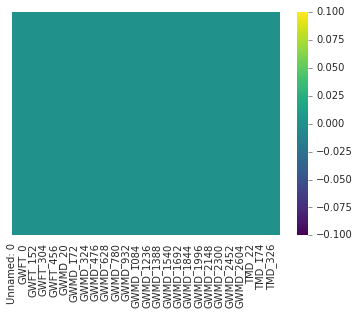

In [ ]:
sns.heatmap(Data_full.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [ ]:
Data_full_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Columns: 174 entries, Unnamed: 0 to label
dtypes: float64(172), int64(2)
memory usage: 186.4 KB


In [ ]:
Data_full_PCA.describe()

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'GWFT_flen_PCA1', y = 'GWFT_flen_PCA2', hue = 'label', data = Data_full_PCA )

In [ ]:

Cancer = Data_full_PCA[Data_full_PCA.label == 1]
Cancer

In [ ]:
Control = Data_full_PCA[Data_full_PCA.label == 0]
Control

In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='GWFT_flen_PCA1', vdims=[ 'label'])
scatter.opts(color='GWFT_flen_PCA1', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#PCA1>20 -> Label 0 


In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='GWFT_flen_PCA2', vdims=[ 'label'])
scatter.opts(color='GWFT_flen_PCA2', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# PCA2>7 -> Label 1

In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='GWFT_flen_PCA3', vdims=[ 'label'])
scatter.opts(color='GWFT_flen_PCA3', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='GWMD_PCA0', vdims=[ 'label'])
scatter.opts(color='GWMD_PCA0', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import holoviews as hv
hv.extension('bokeh', logo=False)

scatter = hv.Scatter(Data_full_PCA.dropna(), kdims='TMD_PCA93', vdims=[ 'label'])
scatter.opts(color='TMD_PCA93', size=10, padding=.1, tools=['hover'], colorbar=True, cmap='magma', width=500, height=400, clim=(-10,40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X = Data_full_PCA[['GWFT_flen_PCA1','GWFT_flen_PCA2']]
y = Data_full_PCA.label

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X1_train, y1_train, X1_test, y1_test, train=True):
    if train:
        pred = clf.predict(X1_train)
        clf_report = pd.DataFrame(classification_report(y1_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y1_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y1_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X1_test)
        clf_report = pd.DataFrame(classification_report(y1_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y1_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y1_test, pred)}\n")

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X = Data_full_PCA.GWFT_flen_PCA1
y = Data_full_PCA.label

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 66.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.619048  0.663158   0.809524      0.791479
recall      0.255814   1.000000  0.663158   0.627907      0.663158
f1-score    0.407407   0.764706  0.663158   0.586057      0.602981
support    43.000000  52.000000  0.663158  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[11 32]
 [ 0 52]]

Test Result:
Accuracy Score: 71.43%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.657143  0.714286   0.828571      0.812245
recall      0.368421   1.000000  0.714286   0.684211      0.714286
f1-score    0.538462   0.793103  0.714286   0.665782      0.677908
support    19.000000  23.000000  0.714286  42.000000     42.000000
___________________________

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 69.47%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.694444   0.694915  0.694737   0.694680      0.694702
recall      0.581395   0.788462  0.694737   0.684928      0.694737
f1-score    0.632911   0.738739  0.694737   0.685825      0.690838
support    43.000000  52.000000  0.694737  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[25 18]
 [11 41]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.823529   0.800000  0.809524   0.811765      0.810644
recall      0.736842   0.869565  0.809524   0.803204      0.809524
f1-score    0.777778   0.833333  0.809524   0.805556      0.808201
support    19.000000  23.000000  0.809524  42.000000     42.000000
___________________________

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=1, gamma=2, coef0 = 1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 70.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.682927   0.722222  0.705263   0.702575      0.704436
recall      0.651163   0.750000  0.705263   0.700581      0.705263
f1-score    0.666667   0.735849  0.705263   0.701258      0.704535
support    43.000000  52.000000  0.705263  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[28 15]
 [13 39]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.789474   0.826087  0.809524    0.80778      0.809524
recall      0.789474   0.826087  0.809524    0.80778      0.809524
f1-score    0.789474   0.826087  0.809524    0.80778      0.809524
support    19.000000  23.000000  0.809524   42.00000     42.000000
___________________________

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=1, gamma=2, coef0 = 1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 70.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.682927   0.722222  0.705263   0.702575      0.704436
recall      0.651163   0.750000  0.705263   0.700581      0.705263
f1-score    0.666667   0.735849  0.705263   0.701258      0.704535
support    43.000000  52.000000  0.705263  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[28 15]
 [13 39]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.789474   0.826087  0.809524    0.80778      0.809524
recall      0.789474   0.826087  0.809524    0.80778      0.809524
f1-score    0.789474   0.826087  0.809524    0.80778      0.809524
support    19.000000  23.000000  0.809524   42.00000     42.000000
___________________________

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#LR model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 63.44


In [ ]:
# kNN model:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 64.33


In [ ]:
# RF model:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 60.0


In [ ]:
# Importing the model:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 61.11


In [ ]:
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

N = 1 :: Score = 0.65
N = 2 :: Score = 0.61
N = 3 :: Score = 0.61
N = 4 :: Score = 0.53
N = 5 :: Score = 0.64
N = 6 :: Score = 0.58
N = 7 :: Score = 0.62
N = 8 :: Score = 0.62
N = 9 :: Score = 0.58
N = 10 :: Score = 0.59
N = 11 :: Score = 0.62
N = 12 :: Score = 0.62
N = 13 :: Score = 0.65
N = 14 :: Score = 0.67
N = 15 :: Score = 0.62
N = 16 :: Score = 0.63
N = 17 :: Score = 0.64
N = 18 :: Score = 0.63
N = 19 :: Score = 0.63
N = 20 :: Score = 0.67


In [ ]:
X = Data_full_PCA[['GWFT_flen_PCA1','GWFT_flen_PCA2','GWFT_flen_PCA3']]
y = Data_full_PCA.label

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma=2, coef0 = 1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 74.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.743590   0.750000  0.747368   0.746795      0.747099
recall      0.674419   0.807692  0.747368   0.741055      0.747368
f1-score    0.707317   0.777778  0.747368   0.742547      0.745885
support    43.000000  52.000000  0.747368  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[29 14]
 [10 42]]

Test Result:
Accuracy Score: 76.19%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.764706   0.760000  0.761905   0.762353      0.762129
recall      0.684211   0.826087  0.761905   0.755149      0.761905
f1-score    0.722222   0.791667  0.761905   0.756944      0.760251
support    19.000000  23.000000  0.761905  42.000000     42.000000
___________________________

In [ ]:
# RF model:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 65.0


In [ ]:
X = Data_full_PCA[['GWFT_flen_PCA1','GWFT_flen_PCA2']]
y = Data_full_PCA.label

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=1, gamma=2, coef0 = 1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 70.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.682927   0.722222  0.705263   0.702575      0.704436
recall      0.651163   0.750000  0.705263   0.700581      0.705263
f1-score    0.666667   0.735849  0.705263   0.701258      0.704535
support    43.000000  52.000000  0.705263  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[28 15]
 [13 39]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.789474   0.826087  0.809524    0.80778      0.809524
recall      0.789474   0.826087  0.809524    0.80778      0.809524
f1-score    0.789474   0.826087  0.809524    0.80778      0.809524
support    19.000000  23.000000  0.809524   42.00000     42.000000
___________________________

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=1, gamma=1, coef0 = 1, C=70)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 69.47%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.675000   0.709091  0.694737   0.692045      0.693660
recall      0.627907   0.750000  0.694737   0.688953      0.694737
f1-score    0.650602   0.728972  0.694737   0.689787      0.693499
support    43.000000  52.000000  0.694737  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[27 16]
 [13 39]]

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.789474   0.826087  0.809524    0.80778      0.809524
recall      0.789474   0.826087  0.809524    0.80778      0.809524
f1-score    0.789474   0.826087  0.809524    0.80778      0.809524
support    19.000000  23.000000  0.809524   42.00000     42.000000
___________________________

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma=2, coef0 = 1, C=50)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 70.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.727273   0.693548  0.705263   0.710411      0.708813
recall      0.558140   0.826923  0.705263   0.692531      0.705263
f1-score    0.631579   0.754386  0.705263   0.692982      0.698800
support    43.000000  52.000000  0.705263  95.000000     95.000000
_______________________________________________
Confusion Matrix: 
 [[24 19]
 [ 9 43]]

Test Result:
Accuracy Score: 78.57%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.812500   0.769231  0.785714   0.790865      0.788805
recall      0.684211   0.869565  0.785714   0.776888      0.785714
f1-score    0.742857   0.816327  0.785714   0.779592      0.783090
support    19.000000  23.000000  0.785714  42.000000     42.000000
___________________________

In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

X = tf.placeholder(tf.float32, [None,95])
Y = tf.placeholder(tf.float32, [None, 1])

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
A = Data_full_PCA.drop(columns = 'Unnamed: 0')
A

,GWFT_flen_PCA1,GWFT_flen_PCA2,GWFT_flen_PCA3,GWMD_PCA0,GWMD_PCA1,GWMD_PCA2,GWMD_PCA3,GWMD_PCA4,GWMD_PCA5,GWMD_PCA6,...,TMD_PCA93,TMD_PCA94,TMD_PCA95,TMD_PCA96,TMD_PCA97,TMD_PCA98,TMD_PCA99,TMD_PCA100,TMD_PCA101,label
0,-2.252113,0.899453,0.019169,-22.626602,-0.955284,-4.154077,-1.035126,-3.663447,-0.765360,1.007548,...,1.577601,-0.437137,-0.245068,0.502285,0.403958,-0.392424,-0.631680,-0.547160,0.175688,1
1,-4.870362,0.872972,-0.408866,10.580418,-0.033179,0.933630,-0.083309,0.131926,0.465117,0.401134,...,0.257702,1.727577,-0.755605,1.381055,-0.730707,1.925221,1.448810,-1.597787,-0.213117,1
2,-3.479735,0.198917,-3.157495,-29.393621,-1.225883,-4.060452,-1.008121,-4.126151,-1.250710,-0.014787,...,-0.365554,0.237336,-0.835937,0.144068,-0.054625,-0.945028,-0.576254,-0.925104,0.658569,1
3,-0.600841,2.045409,-3.191008,-18.907390,-0.974975,-3.723416,-0.743967,-3.601837,-1.513645,0.312149,...,2.325722,-1.091551,0.384515,0.891492,0.568381,0.501201,-0.298907,-0.502665,1.290628,1
4,-6.930095,-1.376692,1.074311,-14.833990,-0.117016,-0.285712,-1.786169,-2.420782,0.610925,-0.181394,...,-0.138448,-0.173962,0.076610,0.012057,-0.076024,0.063701,0.044871,0.248054,-0.183889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,21.170894,-3.051210,-5.911851,14.702557,-0.416178,0.462885,-0.075963,0.424256,0.654389,1.098050,...,-2.285225,-0.221851,-0.488331,1.760465,-1.155121,1.584240,-1.150324,0.102925,0.934707,0
133,21.826918,-3.706093,-5.474218,20.403415,-0.683521,0.537625,-0.766408,0.287333,0.153537,0.990772,...,0.084059,1.218026,-2.273921,-0.575008,-0.744358,-0.401741,-0.216370,-0.689311,-0.393442,0
134,23.997792,-5.400871,-2.362513,22.249009,-0.289187,0.279221,-1.316839,2.084294,0.487301,1.710864,...,-2.530112,2.344992,1.139719,1.689523,-1.413931,-0.341317,0.824800,-0.539348,0.142808,0
135,25.746313,-3.976045,-1.174804,9.364984,-0.590986,-0.505449,-0.135786,0.826366,-0.491360,0.869414,...,-0.268737,0.642443,-1.697984,-0.089192,-1.489628,-0.508833,-1.464110,1.938426,1.268311,0


In [ ]:
train,test = train_test_split(A, test_size=0.3, random_state=42)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (95, 173)
Testing Data : (42, 173)


In [ ]:
train_data = train.iloc[:,1:]
test_data = test.iloc[:,1:]
train_x = train_data.iloc[:,1:]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[:,1:]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (95, 171)
Testing Data : (42, 171)


In [ ]:
train_y = train_data.iloc[:,:1]
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data.iloc[:,:1]
print("Testing Data :", test_y.shape)

Training Data : (95, 1)
Testing Data : (42, 1)


In [ ]:
X = tf.placeholder(tf.float32, [None,171])
Y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
# weight
W = tf.Variable(tf.random_normal([171,1], seed=0), name='weight')
# bias
b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

In [ ]:
logits = tf.matmul(X,W) + b

In [ ]:
hypothesis = tf.nn.sigmoid(logits)

cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)

In [ ]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [ ]:
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

NN Pytorch 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X = A.iloc[:, 0:-1]
y = A.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
EPOCHS = 50
BATCH_SIZE = 136
LEARNING_RATE = 0.001

In [ ]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 172
        self.layer_1 = nn.Linear(172, 136) # 172 la so cot cua data, 136 la so hang
        self.layer_2 = nn.Linear(136, 136)
        self.layer_out = nn.Linear(136, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(136)
        self.batchnorm2 = nn.BatchNorm1d(136)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
confusion_matrix(y_test, y_pred_list)

In [ ]:
print(classification_report(y_test, y_pred_list))

In [ ]:
X = Data_GWFT_flen_cleaned.drop(columns = ['Unnamed: 0'])
y = Data_Result_cleaned.label_number


In [ ]:
X.shape

In [ ]:
X.head()

Gen feature Selection - ITMO-FS 

In [ ]:
!pip install ITMO_FS

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from ITMO_FS.embedded import MOS


In [ ]:
X

In [ ]:
y

In [ ]:
sel = MOS()
trX = sel.fit_transform(X, y) #Selection 

In [ ]:
cl1 = SGDClassifier()
cl1.fit(X, y)
cl1.score(X, y)

In [ ]:
cl2 = SGDClassifier()
cl2.fit(trX, y)
cl2.score(trX, y)

In [ ]:
A

In [ ]:
X1 = A.drop(columns = ['label'])
X1

In [ ]:
sel = MOS()
trX = sel.fit_transform(X1, y) #Selection 

In [ ]:
cl1 = SGDClassifier()
cl1.fit(X1, y)
cl1.score(X1, y)

In [ ]:
cl2 = SGDClassifier()
cl2.fit(trX, y)
cl2.score(trX, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print('rf accuracy : ', rf.score(X_test,y_test))

# confision matrix
y_pred = rf.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
print('nb accuracy : ', nb.score(X_test,y_test))

# confisuon matrix
y_pred = nb.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print('svm accuracy :', svm.score(X_test,y_test))

# confisuon matrix
y_pred = svm.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)

In [ ]:
score_list=[]
for each in range(1,30):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))

plt.plot(range(1,30),score_list)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print('knn accuracy :',knn.score(X_test,y_test))
# confisioun matrix
y_pred = knn.predict(X_test)
y_true = y_test

# confisuon matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_true,y_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('dt.accuracy : ', nb.score(X_test,y_test))

# confisuon matrix
y_pred = dt.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print('lr accuracy :', lr.score(X_test,y_test))

# confusion matrix
y_pred = lr.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_pred)

In [ ]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.show()

USE GWFT PCA 11

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X = Data_full_PCA.GWFT_flen_PCA1
y = Data_full_PCA.label

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print('rf accuracy : ', rf.score(X_test,y_test))

# confision matrix
y_pred = rf.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

USE GWFT PCA1,2,33

In [ ]:
X = Data_full_PCA[['GWFT_flen_PCA1','GWFT_flen_PCA2','GWFT_flen_PCA3']]
y = Data_full_PCA.label

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print('rf accuracy : ', rf.score(X_test,y_test))

# confision matrix
y_pred = rf.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

In [ ]:
X = Data_full_PCA[['GWFT_flen_PCA1','GWFT_flen_PCA2']]
y = Data_full_PCA.label

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print('rf accuracy : ', rf.score(X_test,y_test))

# confision matrix
y_pred = rf.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

In [ ]:
X = Data_full_PCA[['GWFT_flen_PCA1','GWFT_flen_PCA2','GWFT_flen_PCA3']]
y = Data_full_PCA.label

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print('rf accuracy : ', rf.score(X_test,y_test))

# confision matrix
y_pred = rf.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=1, gamma=1, coef0 = 1, C=30)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

GEN SELECTION ITMO_FS librarylibrary

https://github.com/ctlab/ITMO_FS 

---

